In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.special import gamma
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from ipywidgets import interact
import ipywidgets as ipyw

En el siguiente ejemplo usamos un método de MonteCarlo para calcular el número $\pi$ y el área de un cuarto de círculo inscripto en un cuadrado. El método funciona de la siguiene forma.

* Generamos al azar una cierta cantidad de puntos dentro del cuadrado.
* Contamos cuantos de esos puntos caen dentro del círculo.
* El área del círculo es proporcial a la cantidad de puntos que caen dentro del círuclo respecto del total de puntos generados.

In [2]:
def mc(N, calc_area=True):
    xc = np.linspace(0, 1, 100)
    yc = (1 - xc**2)**0.5
    plt.plot(xc, yc, 'k-')
    plt.plot([0, 1, 1, 0, 0], [1, 1, 0, 0, 1], color='grey', ls='-')

    x, y = np.random.uniform(0, 1, size=(2, N))
    inside = (x**2 + y**2)  <= 1
    outside = np.invert(inside)

    plt.plot(x[inside], y[inside], 'C0.')
    plt.plot(x[outside], y[outside], 'C2.')
    if calc_area:
        area = inside.sum()/N
        error = abs((area - np.pi/4)/area) * 100
        plt.plot(0, 0,
                 label='$área$ = {:4.2f}\nerror = {:4.2f}%'.format(area, error),
                 alpha=0)
    else:
        pi = inside.sum()*4/N
        error = abs((pi - np.pi)/pi)* 100
        plt.plot(0, 0,
                 label='$\hat \pi$ = {:4.2f}\nerror = {:4.2f}%'.format(pi, error),
                 alpha=0)

    plt.axis('square')
    plt.legend(frameon=True,
               framealpha=0.6,
               fontsize=16,
               loc=4);

interact(mc,
         N=ipyw.IntSlider(min=100, max=5000, step=1000, value=100));

A Jupyter Widget

## La maldición de la dimensionalidad

* O la concentración de la medida
* O en dimensiones altas pasan cosas locas

La mayoría de las personas dirían que el ejemplo anterior es un método válido para calcular volúmenes si en vez de circulos y cuadrados usáramos esferas y cubos. Si esto fuese cierto uno podría aventurarse a pensar que entonces debería funcionar en cualquier dimensión, es decir podríamos calcular _volúmenes_ usando d-esferas y d-cubos (dond `d` es cualquier entero mayor a 2). 

El siguiente código muestra que hay un problema con esa idea. A medida que las dimensiones aumentan el cociente entre el volumen de la d-esfera y el del d-cubo tiende a 0. Por lo tanto si usaramos este método en dimensiones _altas_ tendríamos que la mayoría de los puntos caen fuera de la d-esfera! y se acumulan en las _esquinas_ del d-cubo. 

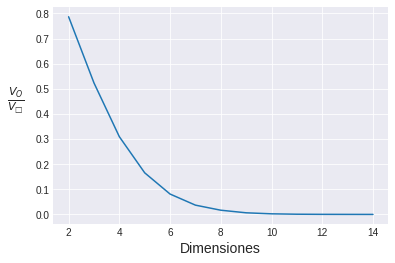

In [3]:
total = 100000
dimensiones = range(2, 15)
r = 1

v_relativo = []
for d in dimensiones:
    x = np.random.random(size=(d, total))
    inside = ((x ** 2).sum(axis=0) < 1).sum()
    v_n = inside / total
    v_relativo.append(inside / total)

plt.plot(dimensiones, v_relativo);
plt.xlabel('Dimensiones', fontsize=14)
plt.ylabel(r'$\frac{V_{O}}{V_{□}}$', rotation=0, labelpad=20, fontsize=16);

Esto hace que este tipo de métodos NO funcione en dimensiones altas. Otros métodos como Metropolis-Hastings o MonteCarlo Hamiltoniano si funcionan en estos casos, intuitivamente estos métodos son capaces de concentrar el muestreo (la generación de puntos) en las zonas que nos interesa muestrear.

El volumen de una esfera en n-dimensiones es 

$$V_{d}(r)={\frac {\pi ^{\frac {n}{d}}}{\Gamma \left({\frac {d}{2}}+1\right)}}r^{d}$$

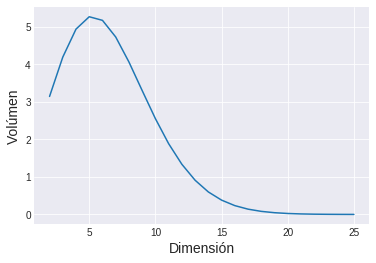

In [4]:
dimensiones = range(2, 26)
r = 1

v_ss = []
for d in dimensiones:
    v_c = (2*r)**d
    v_s = r**d * (np.pi**(d/2) / gamma(d/2 + 1))
    v_ss.append(v_s)

plt.plot(dimensiones, v_ss)
plt.xlabel('Dimensión', fontsize=14);
plt.ylabel('Volúmen', fontsize=14);